In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings 

warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("BASE_PREDIÇÃO_2025.xlsx")

In [3]:
df.head()

,ID,NATZ,DIASEM,TIPDIA,FASEMÊS,TPMÊS,TPHORA,BAIRRO,ZONA,CRIME
0,1,1,4,1,1,1,6,5,2,1
1,2,1,4,1,1,1,2,2,3,0
2,3,3,5,1,1,1,3,1,1,1
3,4,3,5,1,1,1,2,4,3,0
4,5,1,5,1,1,1,5,1,1,1


Test Accuracy: 0.65


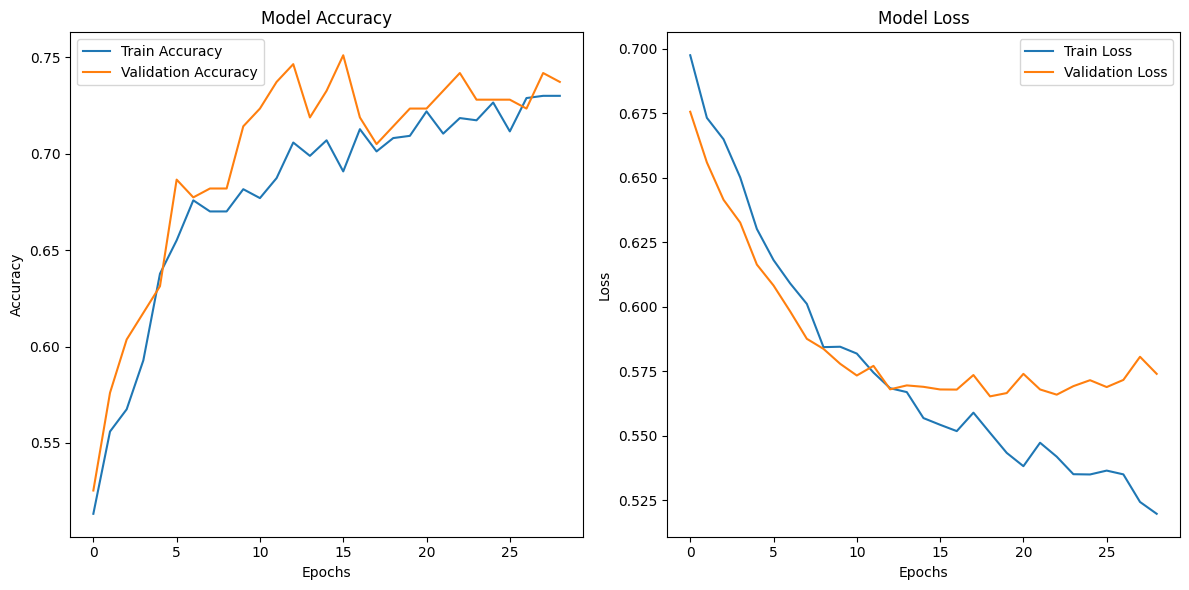

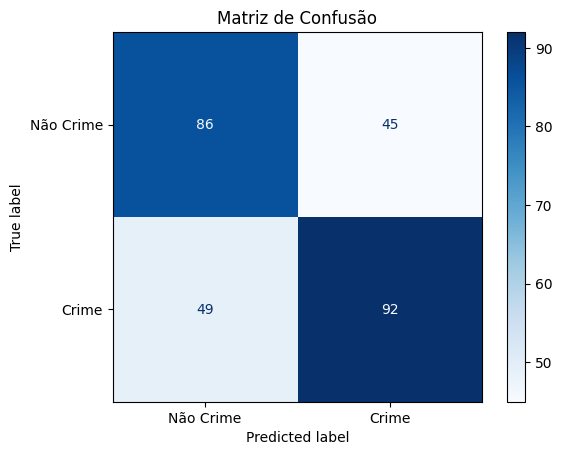

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Função para construir o modelo de rede neural
def build_model():
    model = Sequential([
        Dense(200, activation='relu', input_shape=(X_train.shape[1],)),  # Primeira camada oculta
        Dropout(0.3),  # Dropout para evitar overfitting
        Dense(32, activation='relu'),  # Segunda camada oculta
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmoidal (problema binário)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',  # Para classificação binária
                  metrics=['accuracy'])
    return model

# Divisão dos dados
X = df.drop(columns=["CRIME", "ID"])
y = df["CRIME"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Callback para EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a métrica de validação (loss)
    patience=10,         # Número de epochs sem melhora antes de parar
    restore_best_weights=True  # Restaura os melhores pesos do modelo
)

# Criação do Pipeline com EarlyStopping
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('nn', KerasClassifier(
        model=build_model, 
        epochs=100, 
        batch_size=16, 
        verbose=0,
        validation_split=0.2,  # Adiciona dados de validação durante o treinamento
        callbacks=[early_stopping]  # Adiciona o EarlyStopping como callback
    ))
])

# Treinamento do Pipeline
pipeline.fit(X_train, y_train)

# Avaliação do Modelo
accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Previsões
predictions = pipeline.predict(X_test)

# Acessar o histórico de treinamento
history = pipeline.named_steps['nn'].history_

# Plot do Histórico de Treinamento
plt.figure(figsize=(12, 6))

# Plot da Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot da Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


conf_matrix = confusion_matrix(y_test, predictions)

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Não Crime", "Crime"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

In [12]:
kfold = StratifiedKFold(n_splits=10)

# Aplicando K-Fold ao pipeline
scores = cross_val_score(
    pipeline,  
    X,   
    y,   
    cv=kfold,  
    scoring='f1', 
    verbose=0
)

for i, j in enumerate(scores):
    print(f"Fold {i}: {round(j, 2) * 100}")
print(f"Média dos scores: {scores.mean():.4f}")
print(f"Desvio padrão dos scores: {scores.std():.4f}")

Fold 0: 55.00000000000001
Fold 1: 34.0
Fold 2: 66.0
Fold 3: 65.0
Fold 4: 62.0
Fold 5: 67.0
Fold 6: 60.0
Fold 7: 68.0
Fold 8: 64.0
Fold 9: 70.0
Média dos scores: 0.6090
Desvio padrão dos scores: 0.0986


In [6]:
import joblib 

joblib.dump(pipeline, "modelo-predicao.pkl")

['modelo-predicao.pkl']

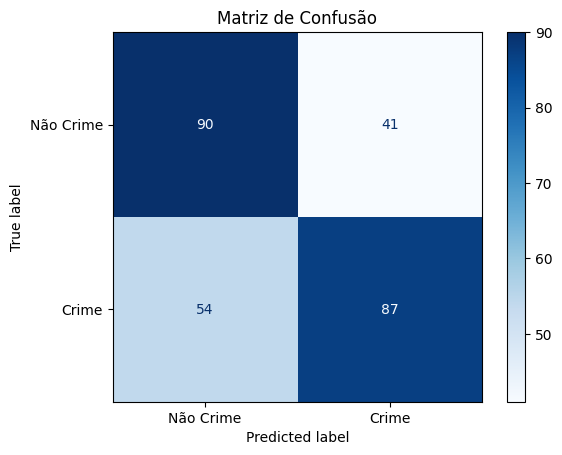

In [ ]:

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Não Crime", "Crime"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()